In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [102]:
from matplotlib.projections import axes
def show_cross_play(result_matrix, title=""):
    table = np.around(result_matrix, decimals=2)
    fig, ax = plt.subplots()
    im = ax.imshow(table)

    # Show all ticks and label them with the respective list entries

    ax.set_xticks(np.arange(0, len(table[0]), 5))
    ax.set_yticks(np.arange(0, len(table), 5))

      


    plt.xlabel("SP")
    plt.ylabel("SP")

    cbar = plt.colorbar(im)
    cbar.set_label('Avg. cumulative reward')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()

def show_subplots(matrices, titles):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
    axes[2, 1].remove()
    axes_coordinates = [(0,0), (0,1), (1,0), (1,1), (2,0)]

    for matrix, title, (ax_x, ax_y) in zip (matrices,titles, axes_coordinates):      
      table = np.around(matrix, decimals=2)
      im = axes[ax_x,ax_y].imshow(table)
      # im = axes[ax_x].imshow(table)

      axes[ax_x,ax_y].set_xticks(np.arange(0, len(table[0]), 5))
      axes[ax_x,ax_y].set_yticks(np.arange(0, len(table), 1))
      yticks = []
      for i in range(3):
        yticks.append(f"{i}(SP)")
      for i in range(3,11):
        yticks.append(f"{i}(POP)")
        
      for i in range(11,13):
        yticks.append(f"{i}(POP-F)")
        

      axes[ax_x,ax_y].set_yticklabels(yticks)

      axes[ax_x,ax_y].set_xlabel("SP Eval set")
      axes[ax_x,ax_y].set_ylabel("Population")
      plt.xlabel("SP eval set")
      plt.ylabel("Population")

      # cbar = plt.colorbar(im, shrink=0.5, ax=axes[ax_x,ax_y])
      cbar = plt.colorbar(im, ax=axes[ax_x,ax_y])
      cbar.set_label('Avg. cumulative reward')

      # Rotate the tick labels and set their alignment.
      plt.setp(axes[ax_x,ax_y].get_xticklabels(), rotation=0, ha="right",
              rotation_mode="anchor")
      axes[ax_x,ax_y].set_title(title)


    fig.tight_layout()
    # plt.savefig(f"Forced_coordination_CNN_POP_NO_DIF.png", dpi=300)
    plt.show()

    # return fig


def remove_daigonal(table):
  return table[~np.eye(table.shape[0],dtype=bool)].reshape(table.shape[0],-1)

def show_sorted_cross_play(matrices, legends, title="", remove_diag=False):
    labels = []
    for matrix,legend in zip(matrices,legends):

      table = np.around(matrix, decimals=2)
      if remove_diag:
        table = remove_daigonal(table)
      table = np.sort(table)

      color = None
      if "SP" in legend:
        color = 'black'
        # ax = plt.plot(range(len(table[0])), np.mean(table, axis=0), label=legend, color=color)
        ax = plt.plot(range(len(table[0])), np.quantile(table, 0.15, axis=0), label=legend, color=color)
        # plt.fill_between(x=range(len(table[0])), y1=np.quantile(table,0.0, axis=0), y2=np.quantile(table,0.50, axis=0), alpha=0.25, color=color)
        continue

      # ax = plt.plot(range(len(table[0])), np.mean(table, axis=0), label=legend, color=color)
      # ax = plt.plot(range(len(table[0])), np.median(table, axis=0), label=legend, color=color)
      # ax = plt.plot(range(len(table[0])), np.min(table, axis=0), label=legend, color=color)
      ax = plt.plot(range(len(table[0])), np.quantile(table, 0.15, axis=0), label=legend, color=color)
      # ax = plt.plot(range(len(table[0])), np.quantile(table, 0.3, axis=0), label=legend, color=color)

      # plt.fill_between(x=range(len(table[0])), y1=np.quantile(table,0.25, axis=0), y2=np.quantile(table,0.75, axis=0), alpha=0.25)
      plt.fill_between(x=range(len(table[0])), y1=np.quantile(table,0.0, axis=0), y2=np.quantile(table,0.30, axis=0), alpha=0.25)
      # plt.fill_between(x=range(len(table[0])), y1=np.quantile(table,0.0, axis=0), y2=np.quantile(table,0.50, axis=0), alpha=0.25)
    

    plt.xlabel("Ordered evaluation results")
    plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='both',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=False,         # ticks along the top edge are off
      labelbottom=False)
    plt.ylabel("Average cummulative reward")
    plt.legend()

    plt.title(title)
    plt.savefig(f"FinalPopFinalPopFsTupleQ15.png", dpi=300)
    plt.show()



def show_box_plot_averages(matrices, labels):
  fig1, ax1 = plt.subplots()
  ax1.set_xlabel('Experiments')
  ax1.set_ylabel('Average cummulative reward')
  ax1.set_xticklabels(labels)
  ax1.boxplot(matrices)

  plt.savefig(f"SimpleCnnExperimentsAvg.png", dpi=300)

def get_sorted_pairwise_best(row1, row2):
  row1_sorted = np.sort(row1)
  row2_sorted = np.sort(row2)
  if np.sum(row1_sorted >= row2_sorted) > np.sum(row2_sorted >= row1_sorted):
    return row1
  else:
    return row2



size = 1944

def scale_matrix(matrix):
  extended_matrix = []
  for row in matrix:
    new_row = np.array([])
    row = np.sort(row)
    for pos in range(len(row) - 1):
      new_row = np.concatenate([new_row, np.linspace(row[pos], row[pos+1], size//len(row))])
    extended_matrix.append(new_row)
  return np.array(extended_matrix)

def extract_threshold_values(matrix):
  intereseting_points = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  
  q = np.quantile(matrix, 0.15, axis=0)

  values = []
  for point in intereseting_points:
    values.append(q[int(q.shape[0] * point) - 1])
  
  return values



# Simple CNN SP eval cross-play

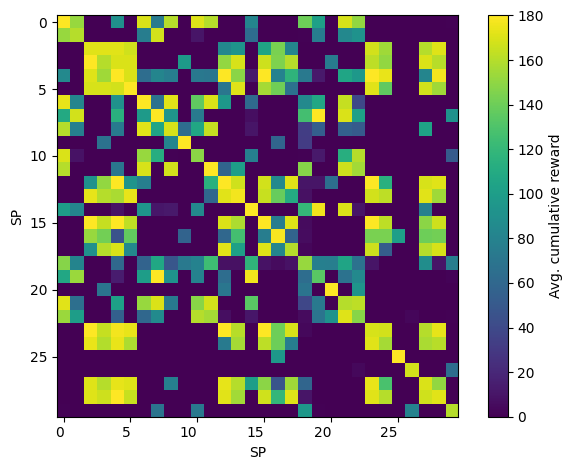

In [103]:
result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
show_cross_play(result_matrix, "")

# print(np.sort(result_matrix.flatten()))


# Simple CNN SP sorted

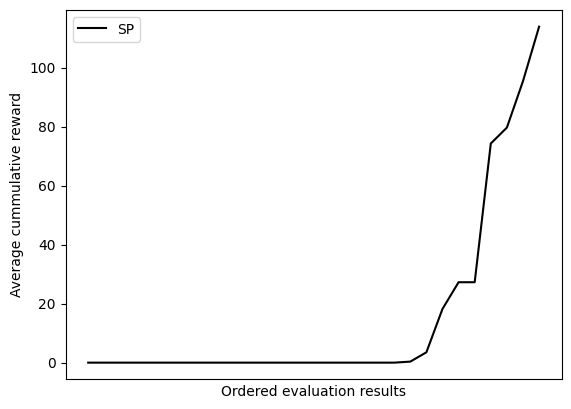

In [104]:
result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")

show_sorted_cross_play([result_matrix], ["SP"],"", remove_diag=True)

# Experiments names and configurations

In [105]:
def simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip):
  return f"POP_SMALL{num}_ROP0.0_MPOP_BRCoef{brcoef}_BRClip{brclip}_LCoef{lcoef}_LClip{lclip}_DSRFalse_PADFalse_X_SP_EVAL2_ROP0.0_ENVROP0.0"

def fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip):
  return f"FS_TUPLE_POP_0{num}_ROP0.0_MPOP_BRCoef{brcoef}_BRClip{brclip}_LCoef{lcoef}_LClip{lclip}_DSRFalse_PADFalse_NSP3_X_FS_TUPLE_SP_EVAL_ENVROP0.0"

def fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip):
  return f"FS_CHANNELS_POP_0{num}_ROP0.0_MPOP_BRCoef{brcoef}_BRClip{brclip}_LCoef{lcoef}_LClip{lclip}_DSRFalse_PADFalse_NSP3_X_FS_CHANNELS_SP_EVAL_ENVROP0.0"

In [106]:
simple_cnn_seeds = [10,11,12,13,14]

simple_cnn_configs = [
    {
      "label": "No divers.",
      "params": (0.0, 0.0, 0.0, 0.0)
    },

    {
      "label": "R0",
      "params": (0.08, 0.025, 0.0, 0.0)
    },

    {
      "label": "R1",
      "params": (0.15, 0.05, 0.0, 0.0)
    },
    {
      "label": "R2",
      "params": (0.1, 0.075, 0.0, 0.0)
    },


    {
      "label": "L0",
      "params": (0.0, 0.0, 0.08, 0.03)
    },
    {
      "label": "L1",
      "params": (0.0, 0.0, 0.12, 0.07)
    },
    {
      "label": "L2",
      "params": (0.0, 0.0, 0.1, 0.15)
    },
        {
      "label": "R1L1",
      "params": (0.1, 0.05, 0.1, 0.05)
    },
]

fs_seeds = [100,101,102]

fs_configs = [
    {
      "label": "No divers.",
      "params": (0.0, 0.0, 0.0, 0.0)
    },

    {
      "label": "R0",
      "params": (0.08, 0.025, 0.0, 0.0)
    },

    {
      "label": "R1",
      "params": (0.15, 0.05, 0.0, 0.0)
    },
    {
      "label": "R2",
      "params": (0.1, 0.075, 0.0, 0.0)
    },

    {
      "label": "L0",
      "params": (0.0, 0.0, 0.08, 0.03)
    },
    {
      "label": "L1",
      "params": (0.0, 0.0, 0.12, 0.07)
    },

    {
      "label": "L2",
      "params": (0.0, 0.0, 0.1, 0.15)
    },
    {
      "label": "R0L0",
      "params": (0.08, 0.02, 0.08, 0.02)
    },
    {
      "label": "R1L1",
      "params": (0.1, 0.04, 0.1, 0.03)
    },
]



#Simple CNN ilustration of bias towards best from init

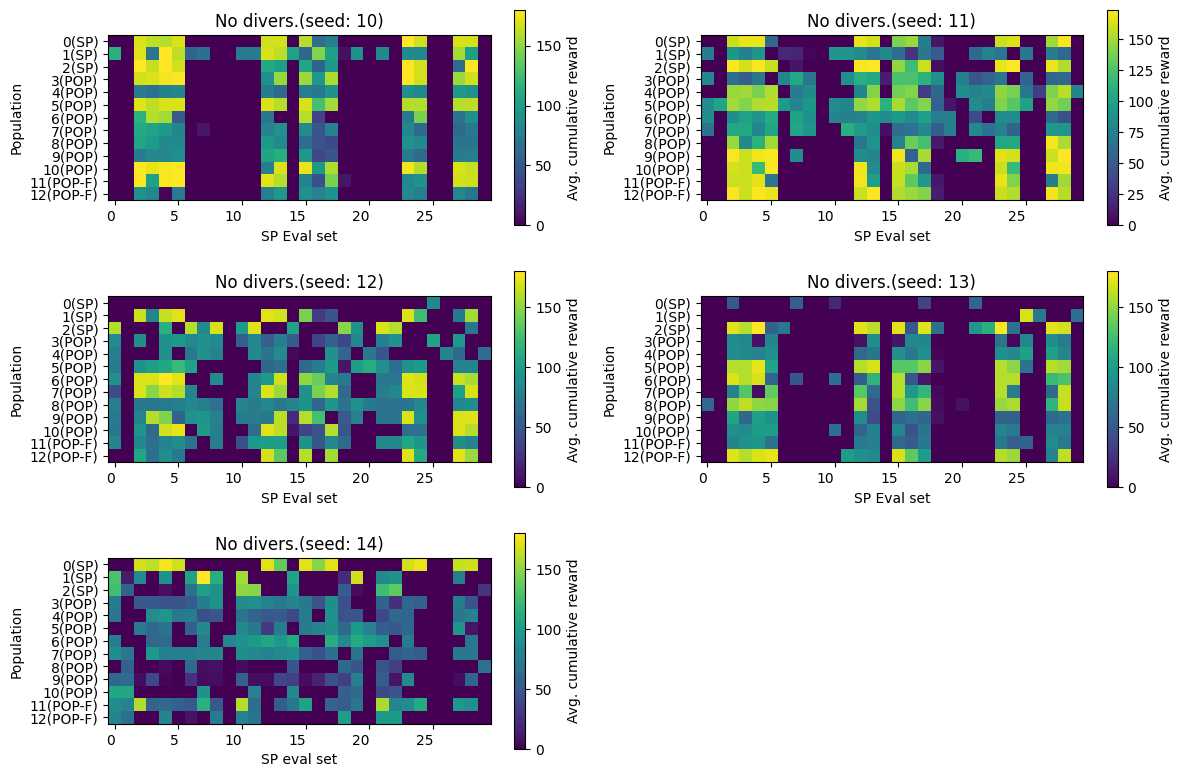

In [107]:
matrices = []
titles = []
for num,seed in zip(range(1,6), simple_cnn_seeds):
  for conf in simple_cnn_configs:
  

    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    matrices.append(result_matrix)
    titles.append(f"{conf['label']}(seed: {seed})")
    break
    
show_subplots(matrices, titles)

#Simple CNN Experiments

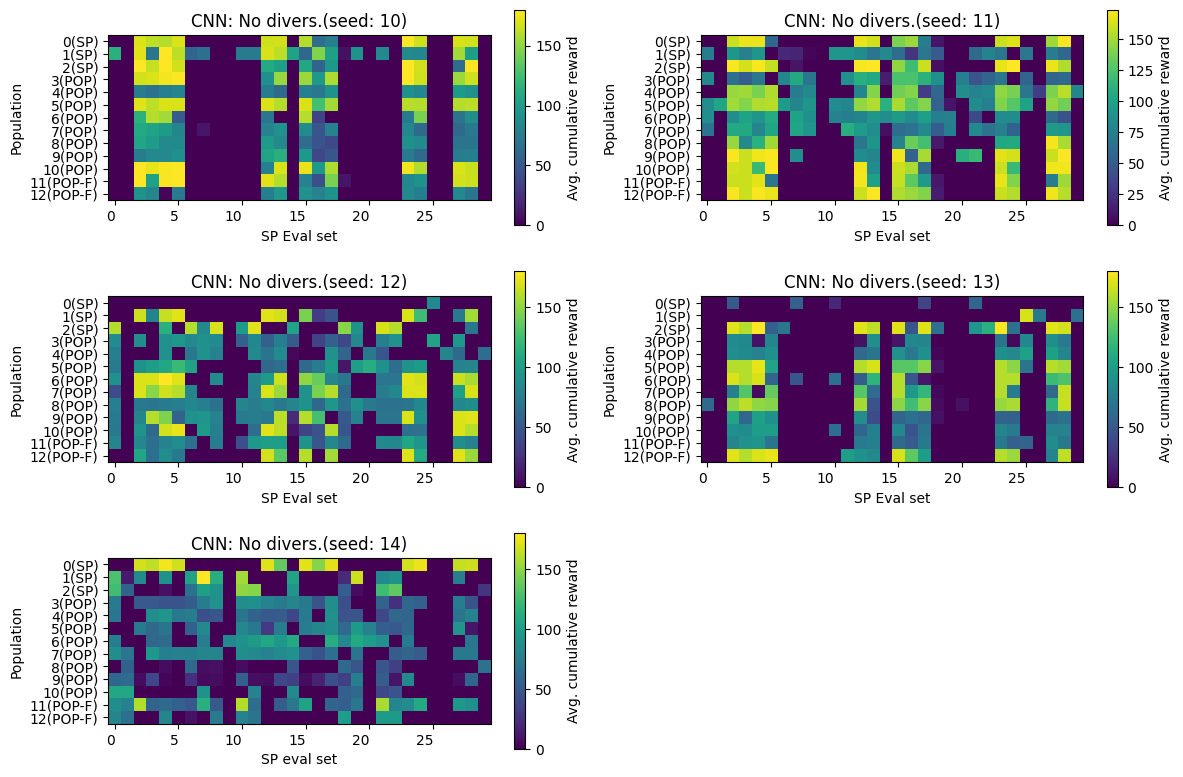

In [108]:
diff_exp_index = 0

matrices = []
titles = []
for num,seed in zip(range(1,6), simple_cnn_seeds):
  conf = simple_cnn_configs[diff_exp_index]
  (brcoef, brclip, lcoef, lclip) = conf["params"]
  eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
  result_matrix = np.loadtxt(eval_name)
  matrices.append(result_matrix)
  titles.append(f"CNN: {conf['label']}(seed: {seed})")

    
show_subplots(matrices, titles)

# Simple CNN Averages visualised

<ipython-input-102-d170d4a08f7d>:126: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


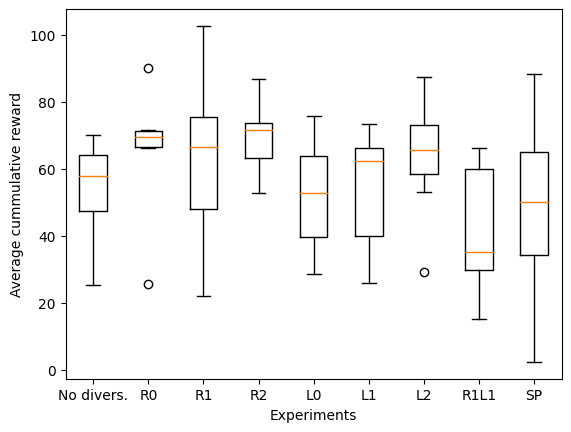

In [109]:
matrices = []
legends = []
for conf in simple_cnn_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,6), simple_cnn_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    # result_matrix = result_matrix[11,:].reshape(1,-1)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(np.mean(seed_cummulative_result,axis=1))
  legends.append(f"{conf['label']}")

result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)
matrices.append(np.mean(result_matrix,axis=1))
legends.append("SP")



# print(np.mean(result_matrix,axis=1))

show_box_plot_averages(matrices, legends)

# Simple CNN POP sorted evaluation - all seeds separated


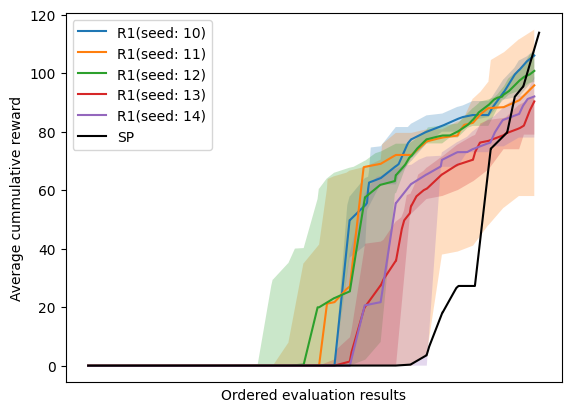

In [110]:
matrices = []
legends = []
for num,seed in zip(range(1,6), simple_cnn_seeds):
  conf = simple_cnn_configs[2]
  (brcoef, brclip, lcoef, lclip) = conf["params"]
  eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
  result_matrix = np.loadtxt(eval_name) 
  result_matrix = result_matrix[3:]
  result_matrix = scale_matrix(result_matrix)
  matrices.append(result_matrix)
  legends.append(f"{conf['label']}(seed: {seed})")


result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)
result_matrix = scale_matrix(result_matrix)
matrices.append(result_matrix)
legends.append("SP")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# Simple CNN POP sorted evaluation - all seeds cummulated


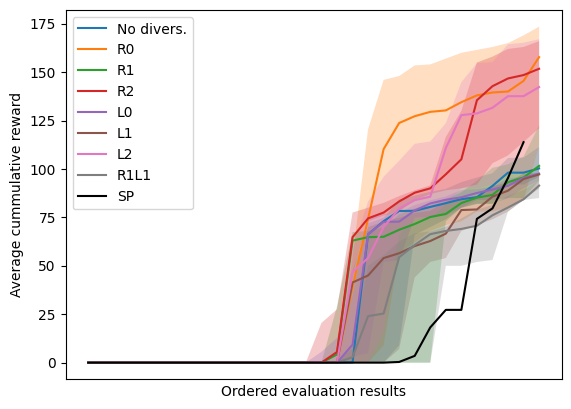

In [111]:
matrices = []
legends = []
for conf in simple_cnn_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,6), simple_cnn_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")


result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)

matrices.append(np.array(result_matrix))
legends.append("SP")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


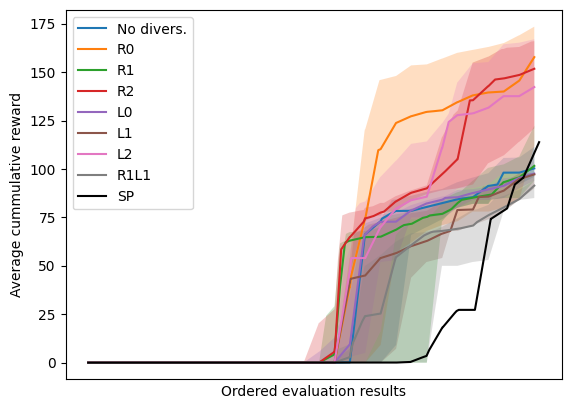

In [112]:
matrices = []
legends = []
for conf in simple_cnn_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,6), simple_cnn_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    # result_matrix = result_matrix[11:]
    # result_matrix = result_matrix[11].reshape(1,-1)
    result_matrix = np.array(result_matrix)
    result_matrix = scale_matrix(result_matrix)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")


result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)
result_matrix = scale_matrix(result_matrix)

matrices.append(np.array(result_matrix))
legends.append("SP")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# Simple CNN POP sorted evaluation - all seeds cummulated - only final two agents used

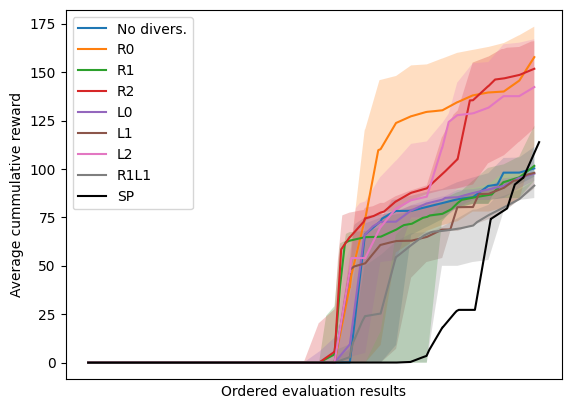

[0.0, 25.330952380952382, 78.32857142857142, 82.70793650793651, 91.34126984126983, 100.3]
[0.0, 54.285714285714285, 124.75, 130.9920634920635, 139.53968253968253, 157.75]
[0.0, 63.68571428571428, 69.97142857142856, 77.4984126984127, 86.67936507936507, 101.6]
[0.0, 68.08333333333333, 84.53571428571428, 98.60317460317461, 143.36507936507937, 151.75]
[0.0, 32.00476190476191, 74.45714285714286, 84.95555555555555, 89.55079365079365, 97.6]
[0.0, 49.88809523809524, 62.84285714285714, 68.72619047619048, 87.34603174603176, 98.0]
[0.0, 53.99999999999999, 80.75714285714285, 116.28253968253968, 132.07619047619048, 142.29999999999998]
[0.0, 13.433333333333332, 56.25, 68.18333333333334, 76.41746031746031, 91.4]
[0.0, 0.0, 0.20681818181818162, 21.893181818181795, 75.23181818181818, 113.84999999999998]


In [113]:
matrices = []
legends = []

simple_cnn_values = []

for conf in simple_cnn_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,6), simple_cnn_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = simple_cnn_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    # if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
    #   result_matrix = result_matrix[11:]
    # else:
    #   result_matrix = result_matrix[12:]

    result_matrix = get_sorted_pairwise_best(result_matrix[11:], result_matrix[12:])
    
    result_matrix = scale_matrix(result_matrix)
    
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")
  simple_cnn_values.append(extract_threshold_values(seed_cummulative_result))
  


result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)
result_matrix = scale_matrix(result_matrix)
simple_cnn_values.append(extract_threshold_values(result_matrix))
matrices.append(result_matrix)
legends.append("SP")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)
for value in simple_cnn_values:
  print(value)

# Frame stacking - Channels

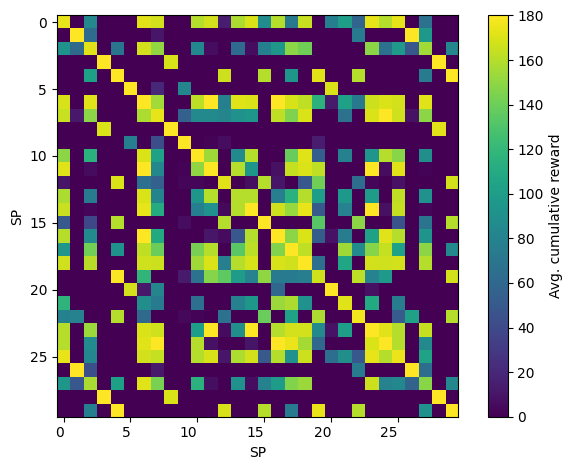

In [114]:
result_matrix = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
show_cross_play(result_matrix, "")



# Frame stacking - Tuple

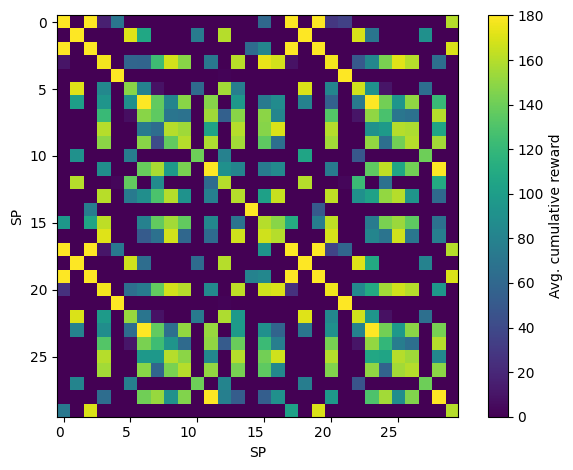

In [115]:
result_matrix = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
show_cross_play(result_matrix, "")

# Frame stacking sorted

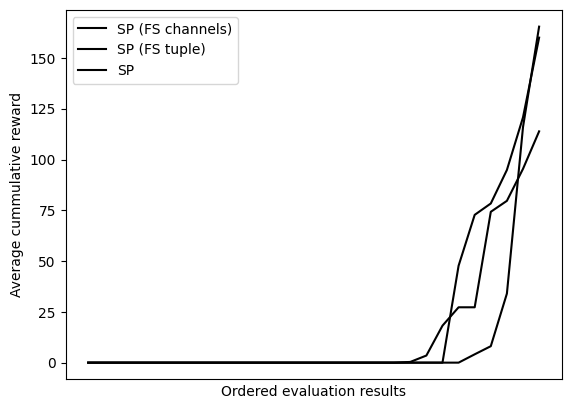

In [116]:
fs_channels = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
fs_tuple = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
cnn = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")

show_sorted_cross_play([fs_channels, fs_tuple, cnn], ["SP (FS channels)", "SP (FS tuple)", "SP"],"", remove_diag=True)

# Frame stacking CHANNELS experiments

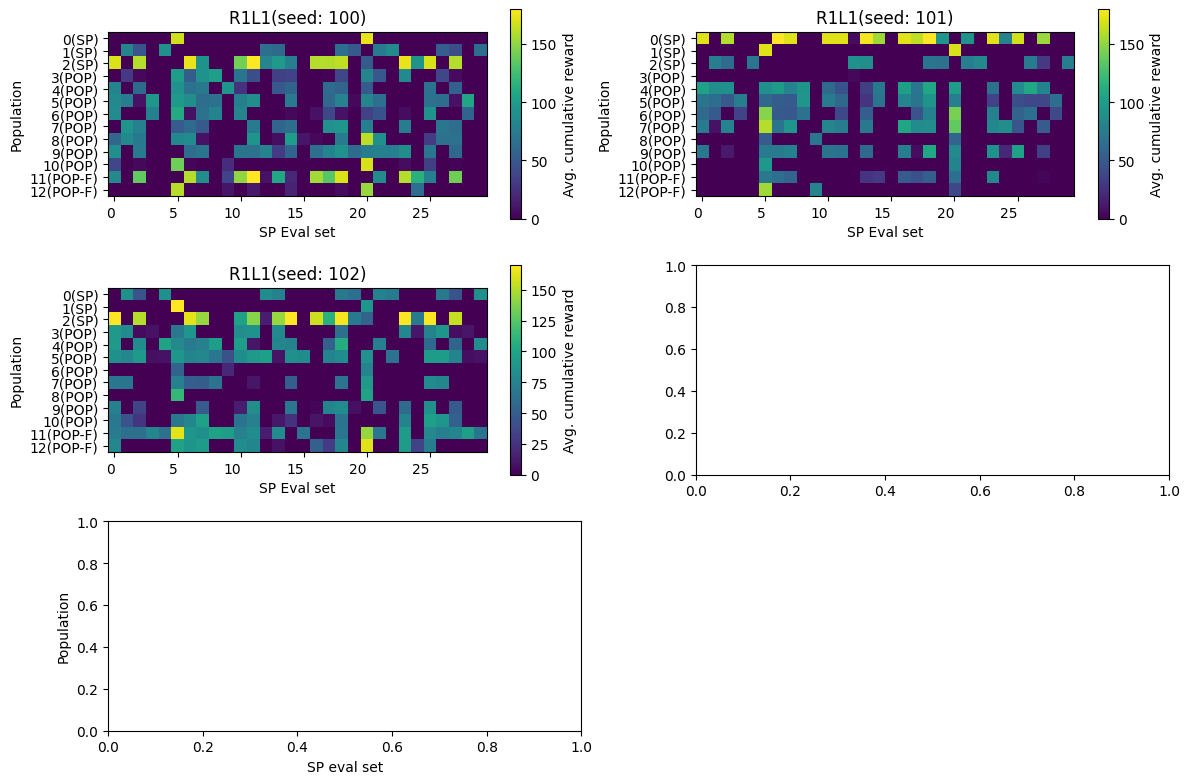

In [117]:
matrices = []
titles = []
for num,seed in zip(range(1,4), fs_seeds):
  conf = fs_configs[8]
  (brcoef, brclip, lcoef, lclip) = conf["params"]
  eval_name = fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip)
  result_matrix = np.loadtxt(eval_name)
  matrices.append(result_matrix)
  titles.append(f"{conf['label']}(seed: {seed})")

    
show_subplots(matrices, titles)

# FS CHANNELS Averages visualised

<ipython-input-102-d170d4a08f7d>:126: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


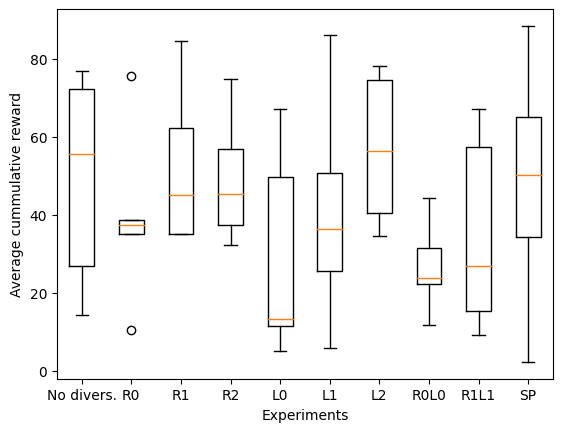

In [118]:
matrices = []
legends = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    # result_matrix = result_matrix[11:]
    # result_matrix = result_matrix[3,:].reshape(1,-1)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])

  # print(np.mean(seed_cummulative_result[0]))
  # print(np.mean(seed_cummulative_result,axis=1))
  # break


  matrices.append(np.mean(seed_cummulative_result,axis=1))
  legends.append(f"{conf['label']}")

result_matrix = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
result_matrix = remove_daigonal(result_matrix)
matrices.append(np.mean(result_matrix,axis=1))
legends.append("SP")



# print(np.mean(result_matrix,axis=1))

show_box_plot_averages(matrices, legends)

# FS CHANNELS POP sorted evaluation - all seeds cummulated


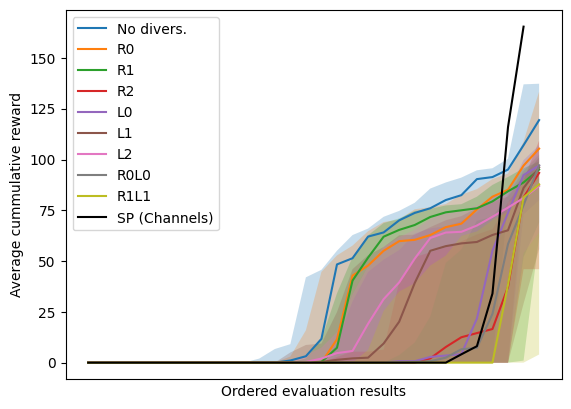

In [119]:
matrices = []
legends = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    result_matrix = result_matrix[3:]
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")


fs_channels = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
matrices.append(fs_channels)
legends.append("SP (Channels)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# FS Channels POP sorted evaluation - all seeds cummulated - only first population agent

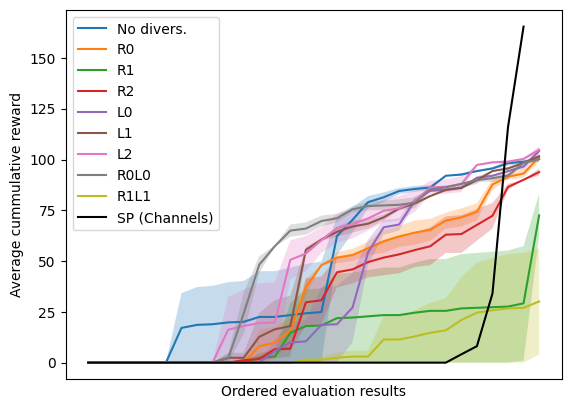

In [120]:
matrices = []
legends = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    # result_matrix = result_matrix[11:]
    result_matrix = result_matrix[3,:].reshape(1,-1)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")


fs_channels = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
matrices.append(fs_channels)
legends.append("SP (Channels)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)

# FS Channels POP sorted evaluation - all seeds cummulated - only first final agent

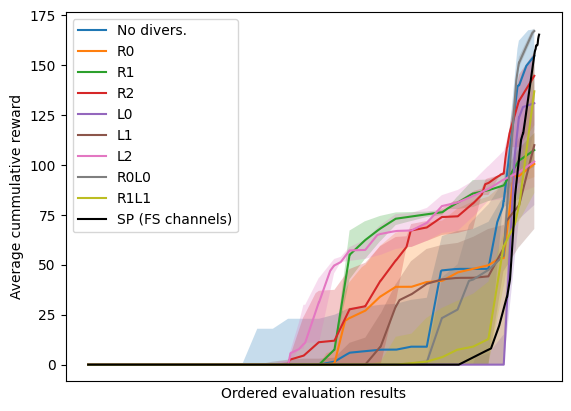

[0.0, 6.2857142857142865, 7.928571428571429, 47.38095238095238, 51.19444444444444, 154.75]
[0.0, 24.77142857142857, 39.0, 42.733333333333334, 50.18095238095238, 100.6]
[0.0, 57.93095238095238, 73.46428571428571, 77.31031746031746, 87.59444444444445, 107.55]
[7.82142857142857, 28.32142857142857, 55.035714285714285, 74.0436507936508, 91.43650793650794, 144.75]
[0.0, 0.0, 0.0, 0.0, 0.0, 131.0]
[0.0, 0.0, 32.57142857142857, 42.88095238095238, 45.361111111111114, 110.0]
[19.82142857142857, 57.345238095238095, 67.07142857142857, 79.80555555555556, 88.37698412698413, 101.75]
[0.0, 0.0, 0.17142857142857143, 24.133333333333333, 47.97142857142857, 167.2]
[0.0, 0.0, 0.21428571428571427, 4.404761904761905, 16.44047619047619, 137.0]
[0.0, 0.0, 0.0, 0.0, 12.099999999999994, 165.4]


In [121]:
matrices = []
legends = []
fs_channels_values = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_channels_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    # result_matrix = result_matrix[11:]
    if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
      result_matrix = result_matrix[11:]
    else:
      result_matrix = result_matrix[12:]
    # result_matrix = result_matrix[11:]
    # result_matrix = get_sorted_pairwise_best(result_matrix[11:], result_matrix[12:])
    result_matrix = scale_matrix(result_matrix)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")
  fs_channels_values.append(extract_threshold_values(seed_cummulative_result))


fs_channels = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
fs_channels = scale_matrix(fs_channels)
fs_channels_values.append(extract_threshold_values(fs_channels))
matrices.append(fs_channels)
legends.append("SP (FS channels)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)
for value in fs_channels_values:
  print(value)

# Frame stacking Tuple experiments

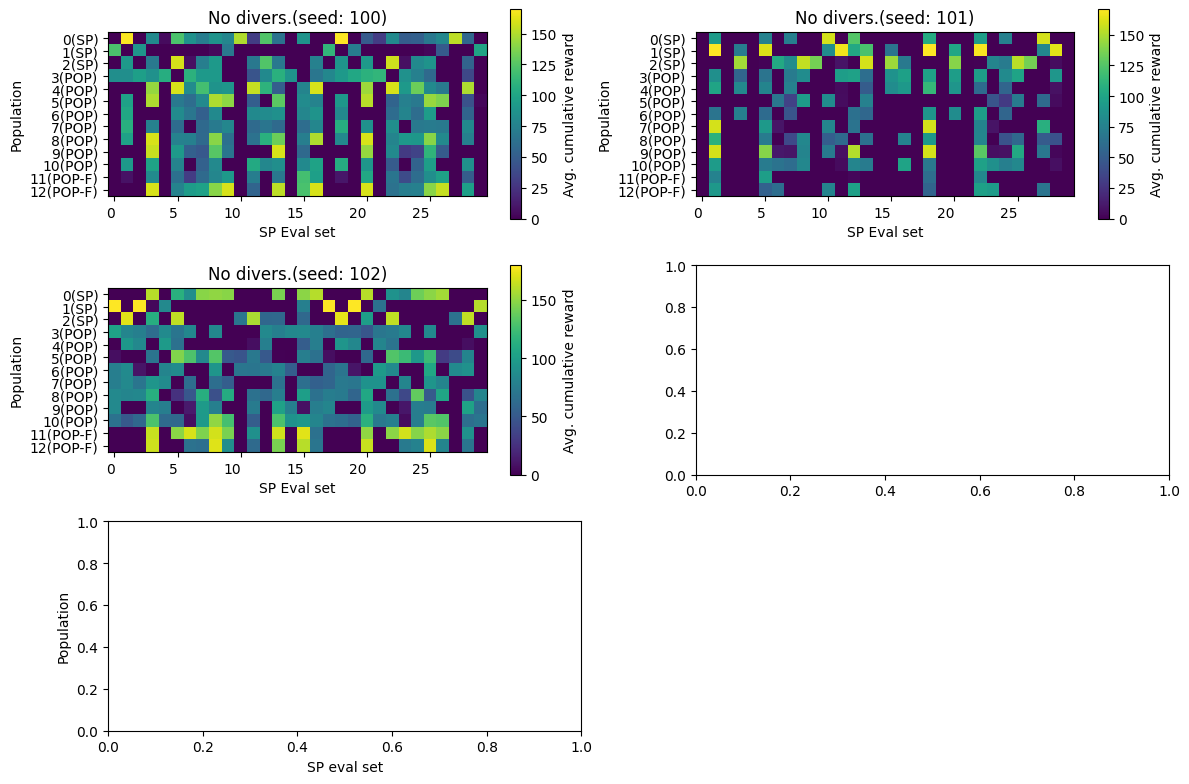

In [122]:
matrices = []
titles = []
for num,seed in zip(range(1,4), fs_seeds):
  conf = fs_configs[0]
  (brcoef, brclip, lcoef, lclip) = conf["params"]
  eval_name = fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip)
  result_matrix = np.loadtxt(eval_name)
  matrices.append(result_matrix)
  titles.append(f"{conf['label']}(seed: {seed})")

    
show_subplots(matrices, titles)

# FS Tuple POP sorted evaluation - all seeds cummulated


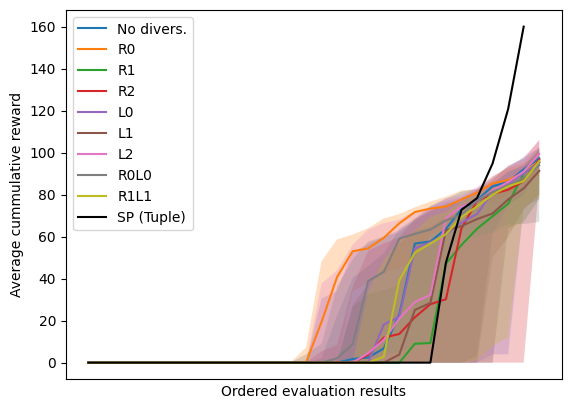

In [123]:
matrices = []
legends = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    result_matrix = result_matrix[3:]
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")


fs_channels = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
matrices.append(fs_channels)
legends.append("SP (Tuple)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# FS Tuple POP sorted evaluation - all seeds cummulated - only first population agent

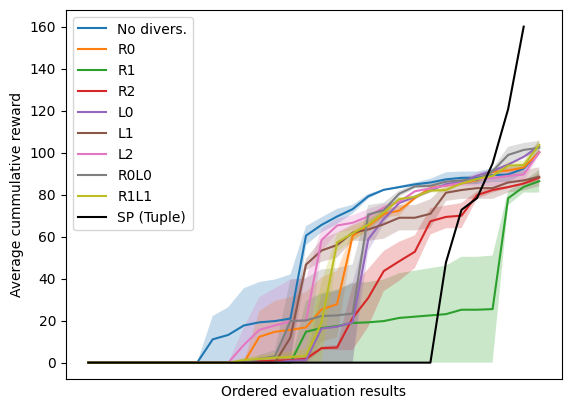

In [124]:
matrices = []
legends = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    result_matrix = result_matrix[3,:].reshape(1,-1)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")


fs_channels = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
matrices.append(fs_channels)
legends.append("SP (Tuple)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)


# FS Tuple POP sorted evaluation - all seeds cummulated - only first final agent

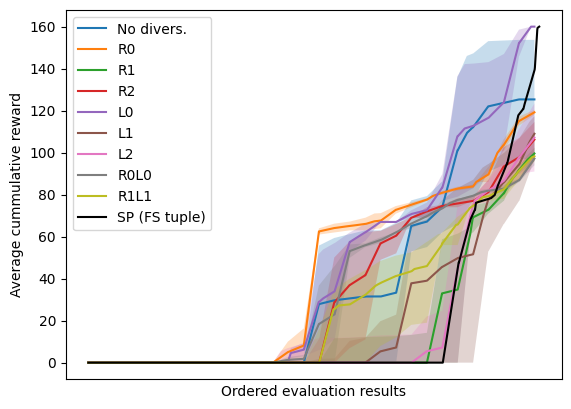

[13.728571428571426, 30.94285714285714, 42.39999999999999, 78.85555555555555, 122.18095238095238, 125.35]
[34.86825396825397, 65.44285714285714, 73.4857142857143, 81.24920634920636, 91.0047619047619, 119.2]
[0.0, 0.0, 0.0, 33.31428571428572, 73.41904761904762, 99.6]
[0.0, 38.75238095238095, 62.85714285714286, 74.80952380952381, 82.16825396825396, 106.2]
[17.59047619047619, 59.233333333333334, 68.08571428571429, 87.57777777777778, 117.13730158730158, 160.0]
[0.0, 0.0, 15.942857142857141, 46.333333333333336, 78.25079365079364, 109.0]
[0.0, 0.0, 0.0, 13.695238095238093, 82.34920634920636, 107.2]
[9.992857142857142, 54.19761904761905, 63.214285714285715, 74.32301587301588, 81.97142857142858, 97.15]
[0.0, 29.464285714285715, 41.89285714285714, 58.452380952380956, 79.5079365079365, 98.25]
[0.0, 0.0, 0.0, 18.06818181818182, 79.46818181818182, 160.0]


In [125]:
matrices = []
legends = []
fs_tuple_values = []
for conf in fs_configs:
  seed_cummulative_result = None
  for num,seed in zip(range(1,4), fs_seeds):
    (brcoef, brclip, lcoef, lclip) = conf["params"]
    eval_name = fs_tuple_eval_set_name(num, brcoef, brclip, lcoef, lclip)
    result_matrix = np.loadtxt(eval_name)
    # if np.mean(result_matrix[11:]) > np.mean(result_matrix[12:]):
    #   result_matrix = result_matrix[11:]
    # else:
    #   result_matrix = result_matrix[12:]
    # result_matrix = result_matrix[11:]
    result_matrix = get_sorted_pairwise_best(result_matrix[11:], result_matrix[12:])
    result_matrix = scale_matrix(result_matrix)
    if seed_cummulative_result is None:
      seed_cummulative_result = result_matrix
    else:
      seed_cummulative_result = np.concatenate([seed_cummulative_result, result_matrix])


  matrices.append(seed_cummulative_result)
  legends.append(f"{conf['label']}")
  fs_tuple_values.append(extract_threshold_values(seed_cummulative_result))


fs_channels = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
fs_channels = remove_daigonal(fs_channels)
fs_channels = scale_matrix(fs_channels)
fs_tuple_values.append(extract_threshold_values(fs_channels))
matrices.append(fs_channels)
legends.append("SP (FS tuple)")
show_sorted_cross_play(matrices, legends, "", remove_diag=False)
for value in fs_tuple_values:
  print(value)


# POP vs POP eval - SIMPLE CNN


<ipython-input-126-6a5bef5a26ad>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  show_sorted_cross_play(np.array(matrices), legends)


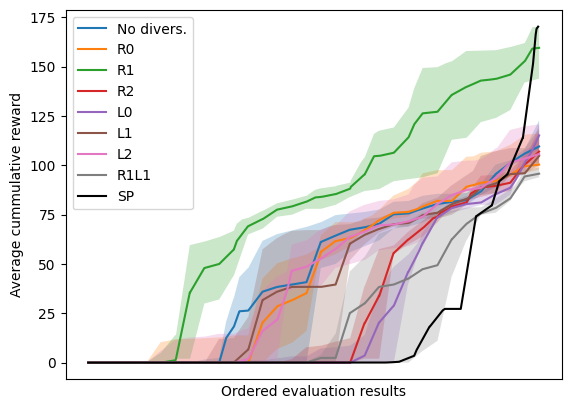

[50.827118644067795, 68.11186440677966, 75.47796610169492, 81.35593220338983, 94.7050847457627, 109.6]
[44.833898305084745, 65.33559322033898, 76.27796610169491, 82.0, 91.9186440677966, 100.4]
[83.36949152542373, 92.71525423728814, 111.68135593220339, 134.05084745762713, 143.71864406779662, 159.6]
[0.0, 11.864406779661016, 60.32542372881356, 78.10169491525423, 89.51864406779661, 107.0]
[0.0, 2.135593220338983, 40.75254237288135, 77.42372881355932, 84.9728813559322, 115.2]
[38.4, 63.010169491525424, 70.61694915254238, 79.5050847457627, 90.57627118644068, 104.8]
[50.664406779661014, 65.34237288135593, 71.11186440677966, 84.06440677966103, 93.07118644067796, 105.8]
[1.1796610169491526, 28.047457627118643, 41.684745762711856, 59.91525423728813, 78.11525423728813, 95.8]
[0.0, 0.0, 1.2499999999999987, 27.24999999999997, 81.67777777777778, 170.35]


In [126]:
sp_eval = np.loadtxt("SP_EVAL2_ROP0.0_X_SP_EVAL2_ROP0.0_ENVROP0.0")
sp_eval = scale_matrix(sp_eval)

simple_cnn_finals = np.loadtxt("SIMPLE_POP_FINALS")

seeds_per_config = 5
median_results = []
legends=[]
pop_eval_simple_cnn_values = []

matrices = []
for i, config in enumerate(simple_cnn_configs):
  matrix = None
  for j, _ in enumerate(simple_cnn_configs):
    sub_no_diag_results = simple_cnn_finals[i*seeds_per_config:i*seeds_per_config + seeds_per_config, j*seeds_per_config:j*seeds_per_config + seeds_per_config]

    sub_no_diag_results = remove_daigonal(sub_no_diag_results)
    if matrix is None:
      matrix = sub_no_diag_results
    else:
      matrix = np.concatenate([matrix, sub_no_diag_results],axis=1)
  matrix = scale_matrix(matrix)

  matrices.append(matrix)
  legends.append(config['label'])
  pop_eval_simple_cnn_values.append(extract_threshold_values(matrix))

matrices.append(sp_eval)
legends.append("SP")
pop_eval_simple_cnn_values.append(extract_threshold_values(sp_eval))

show_sorted_cross_play(np.array(matrices), legends)

for value in pop_eval_simple_cnn_values:
  print(value)

(27, 27)


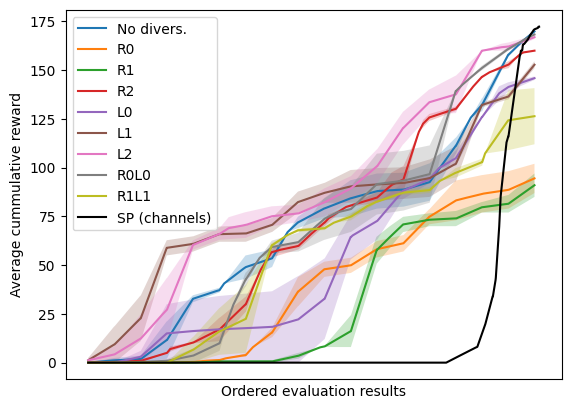

[87.8, 0.0, 87.4, 126.1, 22.5, 68.3]
[61.5, 21.6, 54.9, 23.4, 2.4, 0.0]
[73.3, 9.9, 24.5, 57.7, 0.0, 0.0]
[75.1, 26.099999999999998, 22.7, 105.7, 39.9, 57.6]
[20.4, 25.2, 37.8, 62.3, 77.0, 67.5]
[26.6, 25.8, 80.2, 75.4, 105.8, 25.9]
[71.4, 12.299999999999999, 63.6, 161.8, 4.2, 67.8]
[96.1, 85.3, 71.2, 25.5, 49.5, 81.1]
[23.099999999999998, 28.5, 28.0, 83.2, 70.2, 13.2]
[0.0, 0.0, 0.0, 0.7158730158730154, 37.809523809523796, 172.35]


In [127]:
sp_eval = np.loadtxt("FS_CHANNELS_SP_EVAL_X_FS_CHANNELS_SP_EVAL_ENVROP0.0")
sp_eval = scale_matrix(sp_eval)


fs_channels_finals = np.loadtxt("FS_CHANNELS_POP_FINALS")
print(fs_channels_finals.shape)

seeds_per_config = 3
median_results = []
legends=[]

pop_eval_fs_channels_values = []
matrices = []
for i, config in enumerate(fs_configs):
  matrix = None
  for j, _ in enumerate(fs_configs):
    sub_no_diag_results = fs_channels_finals[i*seeds_per_config:i*seeds_per_config + seeds_per_config, j*seeds_per_config:j*seeds_per_config + seeds_per_config]

    sub_no_diag_results = remove_daigonal(sub_no_diag_results)
    if matrix is None:
      matrix = sub_no_diag_results
    else:
      matrix = np.concatenate([matrix, sub_no_diag_results],axis=1)

  legends.append(config['label'])
  matrices.append(matrix)
  pop_eval_fs_channels_values.append(extract_threshold_values(matrix))

matrices.append(sp_eval)
legends.append("SP (channels)")
pop_eval_fs_channels_values.append(extract_threshold_values(sp_eval))


matrices_a =  copy.deepcopy(matrices)
extended_matrices = []
for matrix in matrices_a:
  extended_matrix = scale_matrix(matrix)
  extended_matrices.append(extended_matrix)

show_sorted_cross_play(extended_matrices, legends)

for value in pop_eval_fs_channels_values:
  print(value)

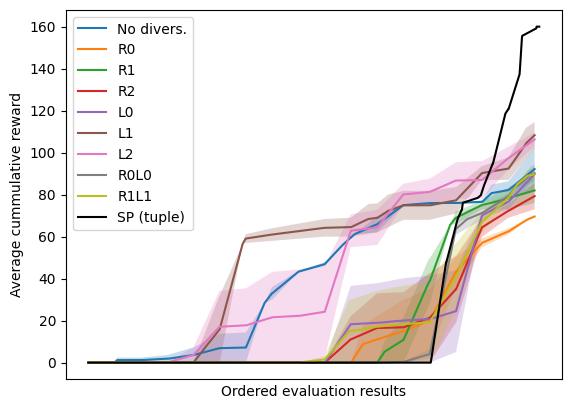

[45.083177570093454, 61.42803738317757, 74.06448598130841, 76.0, 79.9607476635514, 92.2]
[0.0, 3.588785046728972, 14.599065420560747, 33.659813084112145, 58.66448598130842, 69.6]
[0.0, 0.0, 9.998130841121494, 58.936448598130845, 75.96915887850467, 82.0]
[0.0, 12.109345794392523, 16.769158878504673, 29.307476635514014, 66.75981308411215, 79.3]
[0.0, 18.41214953271028, 19.976635514018692, 22.93738317757009, 72.05420560747663, 89.8]
[63.39252336448598, 65.60280373831776, 74.43738317757008, 76.31308411214954, 90.90841121495328, 108.3]
[23.190654205607476, 63.09906542056075, 78.48598130841121, 84.47943925233645, 90.01308411214953, 106.3]
[0.0, 0.0, 0.26915887850467285, 39.191588785046726, 73.58878504672897, 90.2]
[0.7429906542056074, 15.392523364485982, 18.17663551401869, 31.976635514018692, 70.37383177570094, 89.7]
[0.0, 0.0, 0.0, 52.64126984126984, 96.71666666666665, 160.0]


In [128]:
sp_eval = np.loadtxt("FS_TUPLE_SP_EVAL_X_FS_TUPLE_SP_EVAL_ENVROP0.0")
sp_eval = scale_matrix(sp_eval)

fs_tuple_finals = np.loadtxt("FS_TUPLE_POP_FINALS")

seeds_per_config = 3
median_results = []
legends=[]

matrices = []
pop_eval_fs_tuple_values = []
for i, config in enumerate(fs_configs):
  matrix = None
  for j, _ in enumerate(fs_configs):
    sub_no_diag_results = fs_tuple_finals[i*seeds_per_config:i*seeds_per_config + seeds_per_config, j*seeds_per_config:j*seeds_per_config + seeds_per_config]

    sub_no_diag_results = remove_daigonal(sub_no_diag_results)
    if matrix is None:
      matrix = sub_no_diag_results
    else:
      matrix = np.concatenate([matrix, sub_no_diag_results],axis=1)
  legends.append(config['label'])
  matrices.append(matrix)
  

matrices.append(sp_eval)
legends.append("SP (tuple)")



matrices_a =  copy.deepcopy(matrices)
extended_matrices = []
for matrix in matrices_a:
  extended_matrix = []
  extended_matrix = scale_matrix(matrix)
  pop_eval_fs_tuple_values.append(extract_threshold_values(extended_matrix))


  extended_matrices.append(extended_matrix)


show_sorted_cross_play(extended_matrices, legends)
for value in pop_eval_fs_tuple_values:
  print(value)

# Experiments exact value evaluation

In [129]:



# simple_cnn_values - misses R0L0
arr = np.zeros((10,6))
arr[0:8] = simple_cnn_values[0:8]
arr[8] = np.full((1,6), None)
arr[9] = simple_cnn_values[8]
simple_cnn_values = arr

# fs_channels_values
fs_channels_values = np.array(fs_channels_values)
# fs_tuple_values
fs_tuple_values = np.array(fs_tuple_values)

# pop_eval_simple_cnn_values pop eval - q15 
arr = np.zeros((10,6))
arr[0:8] = pop_eval_simple_cnn_values[0:8]
arr[8] = np.full((1,6), None)
arr[9] = pop_eval_simple_cnn_values[8]
pop_eval_simple_cnn_values = arr
pop_eval_simple_cnn_values = np.array(pop_eval_simple_cnn_values)
# pop_eval_fs_channels_values - q15
pop_eval_fs_channels_values = np.array(pop_eval_fs_channels_values)
# pop_eval_fs_tuple_values - q15
pop_eval_fs_tuple_values = np.array(pop_eval_fs_tuple_values)

cramped_room_fs_channels_values = np.array([[17.66384615384615,
  28.11153846153846,
  43.49999999999999,
  89.18153846153847,
  111.08846153846154,
  136.15],
 [8.992307692307692,
  12.134615384615385,
  14.165384615384616,
  22.111538461538462,
  73.8076923076923,
  115.75],
 [14.172307692307692,
  15.953846153846154,
  29.615384615384617,
  54.606153846153845,
  102.04615384615384,
  147.0],
 [9.581538461538461,
  10.230769230769232,
  13.476923076923077,
  27.97846153846154,
  66.12307692307692,
  111.0],
 [13.913846153846153,
  22.880769230769232,
  47.684615384615384,
  85.10153846153845,
  115.23461538461538,
  144.45],
 [3.75, 4.5, 5.457692307692308, 6.75, 10.384615384615383, 88.75],
 [5.4,
  10.107692307692307,
  53.575384615384614,
  64.53846153846153,
  73.04615384615384,
  134.4],
 [9.121538461538462,
  11.01153846153846,
  13.263846153846153,
  29.736153846153847,
  51.926923076923075,
  121.85],
 [15.283076923076925,
  32.69230769230769,
  54.60307692307693,
  91.09846153846154,
  113.32307692307693,
  157.4],
 [11.35,
  15.519402985074626,
  37.15522388059701,
  76.10746268656716,
  107.63731343283581,
  153.1]])

cramped_room_fs_tuple_values = np.array([[6.335384615384615,
  9.384615384615385,
  14.05,
  48.25076923076922,
  69.75769230769231,
  120.35],
 [4.4884615384615385,
  8.288461538461538,
  13.5,
  14.888461538461538,
  19.057692307692307,
  57.0],
 [4.0, 9.215384615384616, 16.8, 33.956923076923076, 84.04615384615384, 113.6],
 [0.6, 4.4, 10.643076923076924, 29.276923076923076, 63.47692307692308, 100.2],
 [7.095384615384615,
  9.6,
  17.40923076923077,
  26.56307692307692,
  87.38461538461539,
  104.0],
 [0.0, 0.0, 0.0, 3.1384615384615384, 10.51923076923077, 138.75],
 [4.242307692307692,
  9.0,
  12.276923076923078,
  66.28461538461538,
  80.5576923076923,
  104.25],
 [7.0,
  7.288461538461538,
  17.957692307692305,
  32.35,
  85.51923076923077,
  110.75],
 [9.25,
  12.084615384615384,
  21.223076923076924,
  44.03230769230769,
  84.36923076923077,
  119.25],
 [6.0,
  7.994776119402984,
  11.311194029850745,
  21.320895522388057,
  52.17388059701492,
  137.1]])

counter_circuit_fs_channels_values = np.array([[5.243076923076923,
  10.276923076923078,
  18.8,
  40.286923076923074,
  56.715384615384615,
  75.7],
 [19.375384615384615,
  28.6,
  44.95076923076923,
  61.09230769230769,
  80.95384615384616,
  91.8],
 [14.886153846153846,
  22.584615384615383,
  38.87384615384615,
  50.56923076923077,
  72.6,
  90.6],
 [14.88923076923077,
  19.092307692307692,
  34.96923076923077,
  62.16615384615385,
  72.93846153846154,
  92.8],
 [38.339999999999996,
  62.94615384615385,
  68.72461538461539,
  80.35461538461539,
  88.5,
  101.85],
 [0.0, 0.0, 0.37384615384615383, 2.5938461538461537, 10.78076923076923, 42.75],
 [2.2215384615384615,
  3.45,
  5.5261538461538455,
  10.967692307692307,
  23.103846153846156,
  55.25],
 [13.692307692307692,
  18.053846153846155,
  31.207692307692305,
  52.97538461538462,
  65.51538461538462,
  91.9],
 [11.611538461538462,
  15.384615384615383,
  25.953846153846154,
  38.02307692307692,
  57.84615384615385,
  85.5],
 [11.35,
  14.067910447761193,
  19.417164179104475,
  38.84626865671641,
  60.821641791044776,
  85.0]]

)

counter_circuit_fs_tuple_values = np.array([[10.19076923076923,
  16.46153846153846,
  26.876923076923077,
  35.70615384615384,
  48.14615384615385,
  82.8],
 [2.9969230769230766,
  4.415384615384616,
  7.6984615384615385,
  13.384615384615383,
  20.215384615384615,
  81.8],
 [7.095384615384615,
  10.184615384615384,
  12.310769230769232,
  15.264615384615386,
  35.4,
  76.6],
 [0.44999999999999996,
  0.8999999999999999,
  1.9,
  1.9,
  4.1038461538461535,
  30.599999999999998],
 [7.9,
  10.084615384615384,
  14.963076923076922,
  24.455384615384617,
  53.96153846153846,
  100.5],
 [5.393076923076922,
  9.242307692307692,
  19.799999999999997,
  32.16461538461538,
  37.86923076923077,
  64.0],
 [6.047692307692308,
  9.6,
  10.693846153846154,
  12.506153846153845,
  29.21538461538461,
  67.2],
 [0.0, 0.0, 0.0, 0.0, 0.6769230769230768, 6.6],
 [4.623076923076923,
  5.75,
  7.819230769230769,
  9.934615384615384,
  24.807692307692307,
  81.0],
 [0.0, 0.0, 0.0, 4.83134328358209, 29.063432835820883, 101.45]])


forced_coordination_max = 180
cramped_room_max = 200
counter_circuit_max = 140

In [132]:



forced_coordination_results = np.array([simple_cnn_values, fs_channels_values, fs_tuple_values])
forced_coordination_final_agents_results = np.array([pop_eval_simple_cnn_values, pop_eval_fs_channels_values, pop_eval_fs_tuple_values])


cramped_room_results = np.array([cramped_room_fs_channels_values, cramped_room_fs_tuple_values])
counter_circuit_results = np.array([counter_circuit_fs_channels_values, counter_circuit_fs_tuple_values])

forced_coordination_results_norm = np.nanmean(forced_coordination_results,axis=0) / forced_coordination_max
forced_coordination_final_agents_results_norm = np.nanmean(forced_coordination_final_agents_results,axis=0) / forced_coordination_max
cramped_room_results_norm = np.nanmean(cramped_room_results,axis=0) / cramped_room_max
counter_circuit_results_norm = np.nanmean(counter_circuit_results,axis=0) / counter_circuit_max

overall_results_norm = np.array([forced_coordination_results_norm, forced_coordination_final_agents_results_norm, cramped_room_results_norm, counter_circuit_results_norm])
# overall_results_norm = np.array([forced_coordination_results_norm, forced_coordination_final_agents_results_norm])


# print(overall_results_norm)

print(np.round(np.mean(overall_results_norm, axis=0), decimals=3))

print(np.round(np.mean(np.mean(overall_results_norm, axis=0), axis=1), decimals=3))

# results = np.round(np.mean(overall_results_norm, axis=0), decimals=3)

# np.savetxt("results.csv", results, delimiter=' & ', fmt='$%.3f$', newline=' \\\\\n')

# for val in np.round(np.mean(np.mean(overall_results_norm, axis=0), axis=1), decimals=3):
#   print(f"${val}$")

[[0.12  0.136 0.246 0.382 0.42  0.603]
 [0.094 0.151 0.242 0.272 0.349 0.516]
 [0.104 0.149 0.209 0.317 0.429 0.567]
 [0.058 0.113 0.188 0.306 0.387 0.542]
 [0.072 0.149 0.227 0.319 0.458 0.642]
 [0.067 0.106 0.177 0.217 0.287 0.495]
 [0.09  0.14  0.223 0.353 0.37  0.551]
 [0.072 0.111 0.155 0.221 0.334 0.522]
 [0.046 0.098 0.139 0.251 0.362 0.556]
 [0.021 0.027 0.048 0.156 0.357 0.784]]
[0.318 0.271 0.296 0.266 0.311 0.225 0.288 0.236 0.242 0.232]
